# Machine Learning Engineer Nanodegree

## Capstone Project

### Inspired by the [Animal Shelter Outcome](https://www.kaggle.com/c/shelter-animal-outcomes) competition in Kaggle

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns

from time import time
from sklearn.metrics import f1_score

%matplotlib inline

In [24]:
# Read train data
raw_data = pd.read_csv("data/train.csv")
print raw_data.head()

  AnimalID     Name             DateTime      OutcomeType OutcomeSubtype  \
0  A671945  Hambone  2014-02-12 18:22:00  Return_to_owner            NaN   
1  A656520    Emily  2013-10-13 12:44:00       Euthanasia      Suffering   
2  A686464   Pearce  2015-01-31 12:28:00         Adoption         Foster   
3  A683430      NaN  2014-07-11 19:09:00         Transfer        Partner   
4  A667013      NaN  2013-11-15 12:52:00         Transfer        Partner   

  AnimalType SexuponOutcome AgeuponOutcome                        Breed  \
0        Dog  Neutered Male         1 year        Shetland Sheepdog Mix   
1        Cat  Spayed Female         1 year       Domestic Shorthair Mix   
2        Dog  Neutered Male        2 years                 Pit Bull Mix   
3        Cat    Intact Male        3 weeks       Domestic Shorthair Mix   
4        Dog  Neutered Male        2 years  Lhasa Apso/Miniature Poodle   

         Color  
0  Brown/White  
1  Cream Tabby  
2   Blue/White  
3   Blue Cream  
4      

## Training considerations

### Features/columns to be considered

- OutcomeType
- AnimalType
- SexuponOutcome
- AgeuponOutcome
- Breed 
- Color

### Features/columns to be ignored

- AnimalID: this is for internal use only.
- Name: this is probably not relevant to predict the animal's outcome.
- DateTime: this is only relevant for when the train data was captured, yet irrelevant for future predictions. Plus, it would be imposible to know when in the future the to-be-predicted outcome will take place.
- OutcomeSubtype: this is outside of the project scope.

## Data cleanup

In [25]:
# Remove ignored features/columns
train_data = raw_data.drop(['AnimalID', 'Name', 'DateTime', 'OutcomeSubtype'], axis=1)
print train_data.head()

       OutcomeType AnimalType SexuponOutcome AgeuponOutcome  \
0  Return_to_owner        Dog  Neutered Male         1 year   
1       Euthanasia        Cat  Spayed Female         1 year   
2         Adoption        Dog  Neutered Male        2 years   
3         Transfer        Cat    Intact Male        3 weeks   
4         Transfer        Dog  Neutered Male        2 years   

                         Breed        Color  
0        Shetland Sheepdog Mix  Brown/White  
1       Domestic Shorthair Mix  Cream Tabby  
2                 Pit Bull Mix   Blue/White  
3       Domestic Shorthair Mix   Blue Cream  
4  Lhasa Apso/Miniature Poodle          Tan  


## Data exploration

In [26]:
n_cols = len(train_data.columns)
n_rows = len(train_data)

print "Number of columns: {0}".format(n_cols)
print "Number of columns: {0}".format(n_rows)

Number of columns: 6
Number of columns: 26729


In [27]:
animaltype_groupby = train_data.groupby('AnimalType')
animaltype_groupby.describe()

AgeuponOutcome                   Breed        Color  \
AnimalType                                                              
Cat        count           11117                   11134        11134   
           unique             44                      60          146   
           top          2 months  Domestic Shorthair Mix  Brown Tabby   
           freq             2220                    8810         1635   
Dog        count           15594                   15595        15595   
           unique             43                    1320          262   
           top           2 years            Pit Bull Mix  Black/White   
           freq             2818                    1906         1730   

                  OutcomeType SexuponOutcome  
AnimalType                                    
Cat        count        11134          11134  
           unique           5              5  
           top       Transfer  Neutered Male  
           freq          5505           3065  
Dog        count        15595          15594  
           unique           5              5  
           top       Adoption  Neutered Male  
           freq          6497           6714

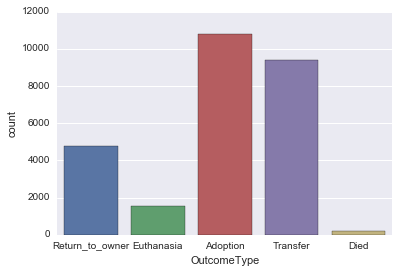

In [28]:
sns.countplot(train_data['OutcomeType'])